In [50]:
from copy import deepcopy
from scipy.spatial import distance 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']= (16,9)
plt.style.use('ggplot')


In [51]:
#importing daata set
data= pd.read_csv('Data dummy.csv')
print(data.shape)
data

(23, 6)


,Nama Produk,Jumlah Stok,Stok Keluar,Keuntungan,Harga Beli,Harga Jual
0,Habbatussauda Extra Propolis Trigon,109,41,118.181818,55000,120000
1,Habbatussauda Oil 200 Kapsul,99,16,122.222222,45000,100000
2,Habasyi Oil 100 Kps,85,16,100.000000,24000,48000
3,Habasyi Oil 210 Kps,81,18,100.000000,45000,90000
4,Kapsul Habbatus Sauda,81,30,140.000000,10000,24000
5,Habat Oil 369,83,49,133.333333,15000,35000
6,Habbatussauda Al-Afiat 100 Kps,113,32,75.000000,20000,35000
7,Habbatussauda Al-Afiat 200 Kps,110,20,100.000000,25000,50000
8,Habbatussauda Oil Al-Afiat 100 Kps,106,38,100.000000,30000,60000
9,Habbatussauda Oil Al-Afiat 200 Kps,99,42,120.000000,50000,110000


In [52]:
f1= data['Jumlah Stok'].values
f2= data['Stok Keluar'].values
f3= data['Keuntungan'].values
f4= data['Harga Beli'].values
f5= data['Harga Jual'].values
f6= data['Nama Produk'].values
X = np.array(list(zip(f1,f2,f3)))
print(data['Nama Produk'].values)

['Habbatussauda Extra Propolis Trigon' 'Habbatussauda Oil 200 Kapsul'
 'Habasyi Oil 100 Kps' 'Habasyi Oil 210 Kps' 'Kapsul Habbatus Sauda'
 'Habat Oil 369' 'Habbatussauda Al-Afiat 100 Kps'
 'Habbatussauda Al-Afiat 200 Kps' 'Habbatussauda Oil Al-Afiat 100 Kps'
 'Habbatussauda Oil Al-Afiat 200 Kps' 'Habbatussauda Oil Al-Afiat 60 Kps'
 'Propolis Brazalian / Botol' 'Propolis Diamond Lite 20 / Botol'
 'Propolis Diamond Regular / Botol' 'Propolis Melia Nature / Botol'
 'Propolis Melia Sehat / Botol' 'Propolis Prosmart/ Botol'
 'Madu Al-Kautsar' 'Madu Batuk Al-Wadey' 'Madu for Mama Al Mabruroh'
 'Madu Hitam Pahit 460 gram' 'Madu Hutan Liar Al Wadey 500 Gram'
 'Madu Hutan Sialang 1 Kg']


In [53]:
#Euclidean Distance
def dist(a, b, ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [54]:
k=3
C_w = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size=k)
C_x = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size=k)
C_y = np.random.randint(np.min(X[:,2]), np.max(X[:,2]), size=k)
C= np.array(list(zip(C_w,C_x,C_y)), dtype=np.float32)
C

array([[107.,  29., 133.],
       [ 91.,  28., 133.],
       [110.,  25.,  99.]], dtype=float32)

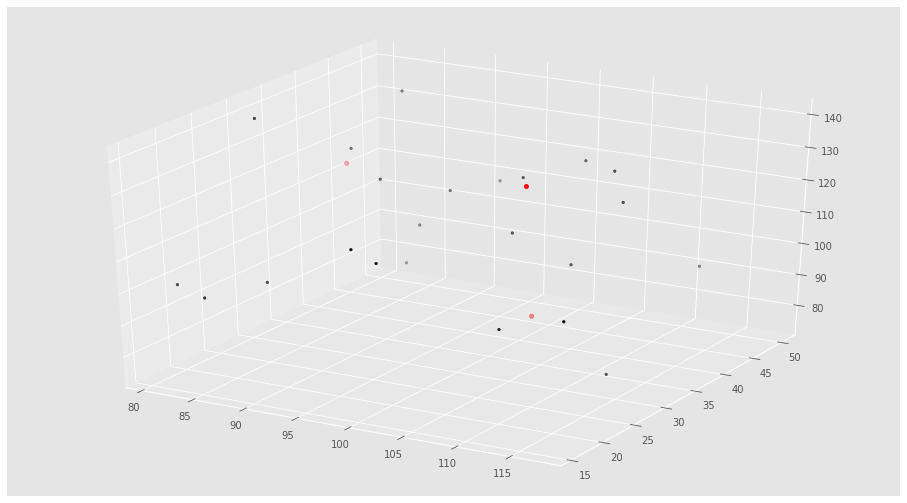

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(f1,f2,f3, c='black', s=7)
ax.scatter(C[:,0],C[:,1],C[:,2], c='red', s=20)

In [56]:
C_old=np.zeros((C.shape))
#label
clusters = np.zeros(len(X))
error = dist(C,C_old)
counter=1
print(X)
while counter <100:
    print("C")
    print(C)
    for i in range(len(X)):
        distance=dist(X[i],C)
        print("dist")
        print(distance)
        cluster = np.argmin(distance)
        print("cluster")
        print(cluster)
        clusters[i] = cluster
    #storing old centroid
    C_old=deepcopy(C)
    #finding the new centroid
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        print("points")
        print(points)
        C[i]=np.mean(points,axis=0)
        print(C[i])
    error = dist(C,C_old)
    counter+=1

[[109.          41.         118.18181818]
 [ 99.          16.         122.22222222]
 [ 85.          16.         100.        ]
 [ 81.          18.         100.        ]
 [ 81.          30.         140.        ]
 [ 83.          49.         133.33333333]
 [113.          32.          75.        ]
 [110.          20.         100.        ]
 [106.          38.         100.        ]
 [ 99.          42.         120.        ]
 [ 89.          42.         100.        ]
 [ 92.          50.         108.33333333]
 [ 89.          36.         120.        ]
 [101.          37.         108.33333333]
 [102.          47.         122.22222222]
 [ 87.          22.         100.        ]
 [ 83.          41.         122.22222222]
 [107.          43.         125.        ]
 [ 87.          43.          85.71428571]
 [100.          18.         116.66666667]
 [ 92.          42.         112.5       ]
 [112.          49.          92.        ]
 [117.          18.         108.33333333]]
C
[[107.  29. 133.]
 [ 91.  28. 1

[11.94794793 23.66692693 32.83390033]
cluster
0
dist
[34.43843918 43.46315758 20.47173389]
cluster
2
dist
[19.33747233 29.092656   23.74283108]
cluster
0
dist
[10.40577472 18.48230418 21.50660127]
cluster
0
dist
[30.08342606 47.37921351 23.71453476]
cluster
2
dist
[27.11108633 44.18744986 24.97334817]
cluster
2
points
[array([109.        ,  41.        , 118.18181818]), array([ 99.        ,  16.        , 122.22222222]), array([ 99.,  42., 120.]), array([ 92.        ,  50.        , 108.33333333]), array([101.        ,  37.        , 108.33333333]), array([102.        ,  47.        , 122.22222222]), array([107.,  43., 125.]), array([100.        ,  18.        , 116.66666667]), array([ 92. ,  42. , 112.5])]
[100.111115  37.333332 117.05106 ]
points
[array([ 81.,  30., 140.]), array([ 83.        ,  49.        , 133.33333333]), array([ 89.,  36., 120.]), array([ 83.        ,  41.        , 122.22222222])]
[ 84.       39.      128.88889]
points
[array([ 85.,  16., 100.]), array([ 81.,  18., 100.

dist
[11.57285039 10.63072365 26.52380973]
cluster
1
dist
[ 8.76926722 26.74940606 14.37595388]
cluster
0
dist
[11.12444334 20.79529753 31.44601597]
cluster
0
dist
[26.4149799  33.65364327 14.59118972]
cluster
2
dist
[18.24761835  7.03167116 32.46616385]
cluster
1
dist
[11.94794793 23.66692693 32.83390033]
cluster
0
dist
[34.43843918 43.46315758 20.47173389]
cluster
2
dist
[19.33747233 29.092656   23.74283108]
cluster
0
dist
[10.40577472 18.48230418 21.50660127]
cluster
0
dist
[30.08342606 47.37921351 23.71453476]
cluster
2
dist
[27.11108633 44.18744986 24.97334817]
cluster
2
points
[array([109.        ,  41.        , 118.18181818]), array([ 99.        ,  16.        , 122.22222222]), array([ 99.,  42., 120.]), array([ 92.        ,  50.        , 108.33333333]), array([101.        ,  37.        , 108.33333333]), array([102.        ,  47.        , 122.22222222]), array([107.,  43., 125.]), array([100.        ,  18.        , 116.66666667]), array([ 92. ,  42. , 112.5])]
[100.111115  37.333

2
dist
[26.24829946 43.26161931 15.45648585]
cluster
2
dist
[18.05165328 36.3258545  11.64916125]
cluster
2
dist
[ 5.63103821 17.69215322 26.83118619]
cluster
0
dist
[20.8799766  29.47147274 16.06557998]
cluster
2
dist
[17.38486339 24.64813836 24.54522387]
cluster
0
dist
[11.57285039 10.63072365 26.52380973]
cluster
1
dist
[ 8.76926722 26.74940606 14.37595388]
cluster
0
dist
[11.12444334 20.79529753 31.44601597]
cluster
0
dist
[26.4149799  33.65364327 14.59118972]
cluster
2
dist
[18.24761835  7.03167116 32.46616385]
cluster
1
dist
[11.94794793 23.66692693 32.83390033]
cluster
0
dist
[34.43843918 43.46315758 20.47173389]
cluster
2
dist
[19.33747233 29.092656   23.74283108]
cluster
0
dist
[10.40577472 18.48230418 21.50660127]
cluster
0
dist
[30.08342606 47.37921351 23.71453476]
cluster
2
dist
[27.11108633 44.18744986 24.97334817]
cluster
2
points
[array([109.        ,  41.        , 118.18181818]), array([ 99.        ,  16.        , 122.22222222]), array([ 99.,  42., 120.]), array([ 92.  

dist
[31.21210672 36.94005557 19.83186315]
cluster
2
dist
[32.08973658 35.84086641 21.62643694]
cluster
2
dist
[30.75168518 14.61016309 47.3299277 ]
cluster
1
dist
[26.34413958 10.9887723  44.73361895]
cluster
1
dist
[44.304173   61.59555163 25.58790637]
cluster
2
dist
[26.24829946 43.26161931 15.45648585]
cluster
2
dist
[18.05165328 36.3258545  11.64916125]
cluster
2
dist
[ 5.63103821 17.69215322 26.83118619]
cluster
0
dist
[20.8799766  29.47147274 16.06557998]
cluster
2
dist
[17.38486339 24.64813836 24.54522387]
cluster
0
dist
[11.57285039 10.63072365 26.52380973]
cluster
1
dist
[ 8.76926722 26.74940606 14.37595388]
cluster
0
dist
[11.12444334 20.79529753 31.44601597]
cluster
0
dist
[26.4149799  33.65364327 14.59118972]
cluster
2
dist
[18.24761835  7.03167116 32.46616385]
cluster
1
dist
[11.94794793 23.66692693 32.83390033]
cluster
0
dist
[34.43843918 43.46315758 20.47173389]
cluster
2
dist
[19.33747233 29.092656   23.74283108]
cluster
0
dist
[10.40577472 18.48230418 21.50660127]
clu

[26.24829946 43.26161931 15.45648585]
cluster
2
dist
[18.05165328 36.3258545  11.64916125]
cluster
2
dist
[ 5.63103821 17.69215322 26.83118619]
cluster
0
dist
[20.8799766  29.47147274 16.06557998]
cluster
2
dist
[17.38486339 24.64813836 24.54522387]
cluster
0
dist
[11.57285039 10.63072365 26.52380973]
cluster
1
dist
[ 8.76926722 26.74940606 14.37595388]
cluster
0
dist
[11.12444334 20.79529753 31.44601597]
cluster
0
dist
[26.4149799  33.65364327 14.59118972]
cluster
2
dist
[18.24761835  7.03167116 32.46616385]
cluster
1
dist
[11.94794793 23.66692693 32.83390033]
cluster
0
dist
[34.43843918 43.46315758 20.47173389]
cluster
2
dist
[19.33747233 29.092656   23.74283108]
cluster
0
dist
[10.40577472 18.48230418 21.50660127]
cluster
0
dist
[30.08342606 47.37921351 23.71453476]
cluster
2
dist
[27.11108633 44.18744986 24.97334817]
cluster
2
points
[array([109.        ,  41.        , 118.18181818]), array([ 99.        ,  16.        , 122.22222222]), array([ 99.,  42., 120.]), array([ 92.        ,

[100.111115  37.333332 117.05106 ]
points
[array([ 81.,  30., 140.]), array([ 83.        ,  49.        , 133.33333333]), array([ 89.,  36., 120.]), array([ 83.        ,  41.        , 122.22222222])]
[ 84.       39.      128.88889]
points
[array([ 85.,  16., 100.]), array([ 81.,  18., 100.]), array([113.,  32.,  75.]), array([110.,  20., 100.]), array([106.,  38., 100.]), array([ 89.,  42., 100.]), array([ 87.,  22., 100.]), array([87.        , 43.        , 85.71428571]), array([112.,  49.,  92.]), array([117.        ,  18.        , 108.33333333])]
[98.7     29.8     96.10476]
C
[[100.111115  37.333332 117.05106 ]
 [ 84.        39.       128.88889 ]
 [ 98.7       29.8       96.10476 ]]
dist
[ 9.68170157 27.26978714 26.81280688]
cluster
0
dist
[21.97922916 28.25675847 29.54068135]
cluster
0
dist
[31.21210672 36.94005557 19.83186315]
cluster
2
dist
[32.08973658 35.84086641 21.62643694]
cluster
2
dist
[30.75168518 14.61016309 47.3299277 ]
cluster
1
dist
[26.34413958 10.9887723  44.73361895

cluster
0
dist
[20.8799766  29.47147274 16.06557998]
cluster
2
dist
[17.38486339 24.64813836 24.54522387]
cluster
0
dist
[11.57285039 10.63072365 26.52380973]
cluster
1
dist
[ 8.76926722 26.74940606 14.37595388]
cluster
0
dist
[11.12444334 20.79529753 31.44601597]
cluster
0
dist
[26.4149799  33.65364327 14.59118972]
cluster
2
dist
[18.24761835  7.03167116 32.46616385]
cluster
1
dist
[11.94794793 23.66692693 32.83390033]
cluster
0
dist
[34.43843918 43.46315758 20.47173389]
cluster
2
dist
[19.33747233 29.092656   23.74283108]
cluster
0
dist
[10.40577472 18.48230418 21.50660127]
cluster
0
dist
[30.08342606 47.37921351 23.71453476]
cluster
2
dist
[27.11108633 44.18744986 24.97334817]
cluster
2
points
[array([109.        ,  41.        , 118.18181818]), array([ 99.        ,  16.        , 122.22222222]), array([ 99.,  42., 120.]), array([ 92.        ,  50.        , 108.33333333]), array([101.        ,  37.        , 108.33333333]), array([102.        ,  47.        , 122.22222222]), array([107.

[array([109.        ,  41.        , 118.18181818]), array([ 99.        ,  16.        , 122.22222222]), array([ 99.,  42., 120.]), array([ 92.        ,  50.        , 108.33333333]), array([101.        ,  37.        , 108.33333333]), array([102.        ,  47.        , 122.22222222]), array([107.,  43., 125.]), array([100.        ,  18.        , 116.66666667]), array([ 92. ,  42. , 112.5])]
[100.111115  37.333332 117.05106 ]
points
[array([ 81.,  30., 140.]), array([ 83.        ,  49.        , 133.33333333]), array([ 89.,  36., 120.]), array([ 83.        ,  41.        , 122.22222222])]
[ 84.       39.      128.88889]
points
[array([ 85.,  16., 100.]), array([ 81.,  18., 100.]), array([113.,  32.,  75.]), array([110.,  20., 100.]), array([106.,  38., 100.]), array([ 89.,  42., 100.]), array([ 87.,  22., 100.]), array([87.        , 43.        , 85.71428571]), array([112.,  49.,  92.]), array([117.        ,  18.        , 108.33333333])]
[98.7     29.8     96.10476]
C
[[100.111115  37.333332 

[26.24829946 43.26161931 15.45648585]
cluster
2
dist
[18.05165328 36.3258545  11.64916125]
cluster
2
dist
[ 5.63103821 17.69215322 26.83118619]
cluster
0
dist
[20.8799766  29.47147274 16.06557998]
cluster
2
dist
[17.38486339 24.64813836 24.54522387]
cluster
0
dist
[11.57285039 10.63072365 26.52380973]
cluster
1
dist
[ 8.76926722 26.74940606 14.37595388]
cluster
0
dist
[11.12444334 20.79529753 31.44601597]
cluster
0
dist
[26.4149799  33.65364327 14.59118972]
cluster
2
dist
[18.24761835  7.03167116 32.46616385]
cluster
1
dist
[11.94794793 23.66692693 32.83390033]
cluster
0
dist
[34.43843918 43.46315758 20.47173389]
cluster
2
dist
[19.33747233 29.092656   23.74283108]
cluster
0
dist
[10.40577472 18.48230418 21.50660127]
cluster
0
dist
[30.08342606 47.37921351 23.71453476]
cluster
2
dist
[27.11108633 44.18744986 24.97334817]
cluster
2
points
[array([109.        ,  41.        , 118.18181818]), array([ 99.        ,  16.        , 122.22222222]), array([ 99.,  42., 120.]), array([ 92.        ,

[100.111115  37.333332 117.05106 ]
points
[array([ 81.,  30., 140.]), array([ 83.        ,  49.        , 133.33333333]), array([ 89.,  36., 120.]), array([ 83.        ,  41.        , 122.22222222])]
[ 84.       39.      128.88889]
points
[array([ 85.,  16., 100.]), array([ 81.,  18., 100.]), array([113.,  32.,  75.]), array([110.,  20., 100.]), array([106.,  38., 100.]), array([ 89.,  42., 100.]), array([ 87.,  22., 100.]), array([87.        , 43.        , 85.71428571]), array([112.,  49.,  92.]), array([117.        ,  18.        , 108.33333333])]
[98.7     29.8     96.10476]
C
[[100.111115  37.333332 117.05106 ]
 [ 84.        39.       128.88889 ]
 [ 98.7       29.8       96.10476 ]]
dist
[ 9.68170157 27.26978714 26.81280688]
cluster
0
dist
[21.97922916 28.25675847 29.54068135]
cluster
0
dist
[31.21210672 36.94005557 19.83186315]
cluster
2
dist
[32.08973658 35.84086641 21.62643694]
cluster
2
dist
[30.75168518 14.61016309 47.3299277 ]
cluster
1
dist
[26.34413958 10.9887723  44.73361895

[27.11108633 44.18744986 24.97334817]
cluster
2
points
[array([109.        ,  41.        , 118.18181818]), array([ 99.        ,  16.        , 122.22222222]), array([ 99.,  42., 120.]), array([ 92.        ,  50.        , 108.33333333]), array([101.        ,  37.        , 108.33333333]), array([102.        ,  47.        , 122.22222222]), array([107.,  43., 125.]), array([100.        ,  18.        , 116.66666667]), array([ 92. ,  42. , 112.5])]
[100.111115  37.333332 117.05106 ]
points
[array([ 81.,  30., 140.]), array([ 83.        ,  49.        , 133.33333333]), array([ 89.,  36., 120.]), array([ 83.        ,  41.        , 122.22222222])]
[ 84.       39.      128.88889]
points
[array([ 85.,  16., 100.]), array([ 81.,  18., 100.]), array([113.,  32.,  75.]), array([110.,  20., 100.]), array([106.,  38., 100.]), array([ 89.,  42., 100.]), array([ 87.,  22., 100.]), array([87.        , 43.        , 85.71428571]), array([112.,  49.,  92.]), array([117.        ,  18.        , 108.33333333])]


1
dist
[26.34413958 10.9887723  44.73361895]
cluster
1
dist
[44.304173   61.59555163 25.58790637]
cluster
2
dist
[26.24829946 43.26161931 15.45648585]
cluster
2
dist
[18.05165328 36.3258545  11.64916125]
cluster
2
dist
[ 5.63103821 17.69215322 26.83118619]
cluster
0
dist
[20.8799766  29.47147274 16.06557998]
cluster
2
dist
[17.38486339 24.64813836 24.54522387]
cluster
0
dist
[11.57285039 10.63072365 26.52380973]
cluster
1
dist
[ 8.76926722 26.74940606 14.37595388]
cluster
0
dist
[11.12444334 20.79529753 31.44601597]
cluster
0
dist
[26.4149799  33.65364327 14.59118972]
cluster
2
dist
[18.24761835  7.03167116 32.46616385]
cluster
1
dist
[11.94794793 23.66692693 32.83390033]
cluster
0
dist
[34.43843918 43.46315758 20.47173389]
cluster
2
dist
[19.33747233 29.092656   23.74283108]
cluster
0
dist
[10.40577472 18.48230418 21.50660127]
cluster
0
dist
[30.08342606 47.37921351 23.71453476]
cluster
2
dist
[27.11108633 44.18744986 24.97334817]
cluster
2
points
[array([109.        ,  41.        , 1

[ 84.       39.      128.88889]
points
[array([ 85.,  16., 100.]), array([ 81.,  18., 100.]), array([113.,  32.,  75.]), array([110.,  20., 100.]), array([106.,  38., 100.]), array([ 89.,  42., 100.]), array([ 87.,  22., 100.]), array([87.        , 43.        , 85.71428571]), array([112.,  49.,  92.]), array([117.        ,  18.        , 108.33333333])]
[98.7     29.8     96.10476]
C
[[100.111115  37.333332 117.05106 ]
 [ 84.        39.       128.88889 ]
 [ 98.7       29.8       96.10476 ]]
dist
[ 9.68170157 27.26978714 26.81280688]
cluster
0
dist
[21.97922916 28.25675847 29.54068135]
cluster
0
dist
[31.21210672 36.94005557 19.83186315]
cluster
2
dist
[32.08973658 35.84086641 21.62643694]
cluster
2
dist
[30.75168518 14.61016309 47.3299277 ]
cluster
1
dist
[26.34413958 10.9887723  44.73361895]
cluster
1
dist
[44.304173   61.59555163 25.58790637]
cluster
2
dist
[26.24829946 43.26161931 15.45648585]
cluster
2
dist
[18.05165328 36.3258545  11.64916125]
cluster
2
dist
[ 5.63103821 17.6921532

In [57]:
print(clusters)
C

[0. 0. 2. 2. 1. 1. 2. 2. 2. 0. 2. 0. 1. 0. 0. 2. 1. 0. 2. 0. 0. 2. 2.]


array([[100.111115,  37.333332, 117.05106 ],
       [ 84.      ,  39.      , 128.88889 ],
       [ 98.7     ,  29.8     ,  96.10476 ]], dtype=float32)

In [58]:
produk = data['Nama Produk']
new_data= np.array(list(zip(produk,clusters)))
produk[3:]

3                    Habasyi Oil 210 Kps
4                  Kapsul Habbatus Sauda
5                          Habat Oil 369
6         Habbatussauda Al-Afiat 100 Kps
7         Habbatussauda Al-Afiat 200 Kps
8     Habbatussauda Oil Al-Afiat 100 Kps
9     Habbatussauda Oil Al-Afiat 200 Kps
10     Habbatussauda Oil Al-Afiat 60 Kps
11            Propolis Brazalian / Botol
12      Propolis Diamond Lite 20 / Botol
13      Propolis Diamond Regular / Botol
14         Propolis Melia Nature / Botol
15          Propolis Melia Sehat / Botol
16              Propolis Prosmart/ Botol
17                       Madu Al-Kautsar
18                   Madu Batuk Al-Wadey
19             Madu for Mama Al Mabruroh
20             Madu Hitam Pahit 460 gram
21     Madu Hutan Liar Al Wadey 500 Gram
22               Madu Hutan Sialang 1 Kg
Name: Nama Produk, dtype: object

[43.62106581075085]
[43.62106581075085, 59.870217449072115]
[43.62106581075085, 59.870217449072115, 28.80751307168412]


Text(0.5, 0, 'Keuntungan')

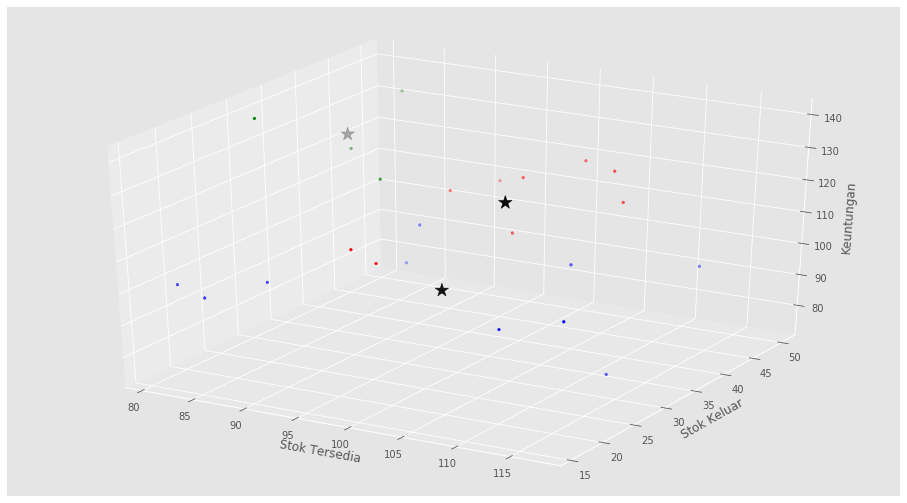

In [59]:
colors= ['r', 'g', 'b', 'y', 'c', 'm']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
result=[]
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        result.append(np.average(points[:,1]*points[:,2]/points[:,0]))
        print(result)
        ax.scatter(points[:, 0], points[:, 1],points[:, 2], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1],C[:, 2], marker='*', s=200, c='#050505')
ax.set_xlabel('Stok Tersedia')
ax.set_ylabel('Stok Keluar')
ax.set_zlabel('Keuntungan')

In [67]:
#Auto labeled k-means
produk1=[]
produk2=[]
produk3=[]
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        produk_cluster = np.array([produk[k] for k in range(len(produk)) if clusters[k] == i])
        if np.min(result)==np.average(points[:,1]*points[:,2]/points[:,0]):
            produk1=produk_cluster
        elif np.max(result)==np.average(points[:,1]*points[:,2]/points[:,0]):
            produk3=produk_cluster
        else:
            produk2=produk_cluster

c
b
a


In [61]:
print("produk1")
print(produk1)
print("produk2")
print(produk2)
print("produk3")
print(produk3)

produk1
['Habasyi Oil 100 Kps' 'Habasyi Oil 210 Kps'
 'Habbatussauda Al-Afiat 100 Kps' 'Habbatussauda Al-Afiat 200 Kps'
 'Habbatussauda Oil Al-Afiat 100 Kps' 'Habbatussauda Oil Al-Afiat 60 Kps'
 'Propolis Melia Sehat / Botol' 'Madu Batuk Al-Wadey'
 'Madu Hutan Liar Al Wadey 500 Gram' 'Madu Hutan Sialang 1 Kg']
produk2
['Habbatussauda Extra Propolis Trigon' 'Habbatussauda Oil 200 Kapsul'
 'Habbatussauda Oil Al-Afiat 200 Kps' 'Propolis Brazalian / Botol'
 'Propolis Diamond Regular / Botol' 'Propolis Melia Nature / Botol'
 'Madu Al-Kautsar' 'Madu for Mama Al Mabruroh' 'Madu Hitam Pahit 460 gram']
produk3
['Kapsul Habbatus Sauda' 'Habat Oil 369'
 'Propolis Diamond Lite 20 / Botol' 'Propolis Prosmart/ Botol']


In [68]:
Bundle =[]
#jenis bundle 1 [0,1]
pro1=random.choice(produk1)
pro2=random.choice(produk1)
pro3=random.choice(produk1)
pro4=random.choice(produk1)
print(pro1,pro2)
print(pro3,pro4)
#jenis bundle 2 [2,3]
pro5=random.choice(produk1)
pro6=random.choice(produk3)
pro7=random.choice(produk1)
pro8=random.choice(produk3)
print(pro5,pro6)
print(pro7,pro8)

Habbatussauda Oil Al-Afiat 60 Kps Habbatussauda Al-Afiat 100 Kps
Habbatussauda Al-Afiat 200 Kps Habbatussauda Al-Afiat 100 Kps
Habbatussauda Oil Al-Afiat 100 Kps Propolis Diamond Lite 20 / Botol
Habasyi Oil 210 Kps Propolis Prosmart/ Botol


In [63]:
#JB 1
harga1= f5[np.argwhere(pro1)]
harga2= f5[np.argwhere(pro2)]
harga3= f5[np.argwhere(pro3)]
harga4= f5[np.argwhere(pro4)]
print(harga1,harga2,harga3,harga4)
#JB 2

[[120000]] [[120000]] [[120000]] [[120000]]
